In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load The dataset

In [4]:
df = pd.read_csv('titanic.csv')  # Adjust filename if needed

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)



Dataset Shape: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

In [5]:
print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
print(df.describe())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Basic statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.20420

In [7]:
# Create a copy for analysis
data = df.copy()

# Check survival distribution

print("SURVIVAL DISTRIBUTION")
print("="*50)
print(data['Survived'].value_counts())
print(f"Survival rate: {data['Survived'].mean():.2%}")

SURVIVAL DISTRIBUTION
Survived
0    549
1    342
Name: count, dtype: int64
Survival rate: 38.38%


In [8]:
#3. NUMERICAL FEATURES ANALYSIS

In [9]:
print("\n" + "="*50)
print("NUMERICAL FEATURES COMPARISON WITH SURVIVAL")
print("="*50)

# Select numerical columns (exclude Survived and PassengerId)
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Survived', 'PassengerId']]

# Statistical comparison for each numerical feature
for col in numerical_cols:
    print(f"\n{col.upper()}:")
    print("-" * 40)
    
    # Split by survival
    survived = data[data['Survived'] == 1][col].dropna()
    died = data[data['Survived'] == 0][col].dropna()
    
    # Statistics
    print(f"Mean (Survived): {survived.mean():.2f}")
    print(f"Mean (Died): {died.mean():.2f}")
    print(f"Median (Survived): {survived.median():.2f}")
    print(f"Median (Died): {died.median():.2f}")
    
    # T-test to check if difference is significant
    t_stat, p_value = stats.ttest_ind(survived, died)
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("✓ SIGNIFICANT difference (p < 0.05)")
    else:
        print("✗ NOT significant (p >= 0.05)")


NUMERICAL FEATURES COMPARISON WITH SURVIVAL

PCLASS:
----------------------------------------
Mean (Survived): 1.95
Mean (Died): 2.53
Median (Survived): 2.00
Median (Died): 3.00
T-statistic: -10.7253
P-value: 0.0000
✓ SIGNIFICANT difference (p < 0.05)

AGE:
----------------------------------------
Mean (Survived): 28.34
Mean (Died): 30.63
Median (Survived): 28.00
Median (Died): 28.00
T-statistic: -2.0667
P-value: 0.0391
✓ SIGNIFICANT difference (p < 0.05)

SIBSP:
----------------------------------------
Mean (Survived): 0.47
Mean (Died): 0.55
Median (Survived): 0.00
Median (Died): 0.00
T-statistic: -1.0538
P-value: 0.2922
✗ NOT significant (p >= 0.05)

PARCH:
----------------------------------------
Mean (Survived): 0.46
Mean (Died): 0.33
Median (Survived): 0.00
Median (Died): 0.00
T-statistic: 2.4420
P-value: 0.0148
✓ SIGNIFICANT difference (p < 0.05)

FARE:
----------------------------------------
Mean (Survived): 48.40
Mean (Died): 22.12
Median (Survived): 26.00
Median (Died): 10.5

In [10]:
# 4. CATEGORICAL FEATURES ANALYSIS
# ============================================================

print("\n" + "="*50)
print("CATEGORICAL FEATURES COMPARISON WITH SURVIVAL")
print("="*50)

# Select categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols += ['Pclass']  # Include Pclass if present

for col in categorical_cols:
    if col in data.columns:
        print(f"\n{col.upper()}:")
        print("-" * 40)
        
        # Crosstab
        ct = pd.crosstab(data[col], data['Survived'], normalize='index') * 100
        print(ct.round(2))
        
        # Chi-square test
        chi2, p_value, dof, expected = stats.chi2_contingency(
            pd.crosstab(data[col], data['Survived'])
        )
        print(f"\nChi-square statistic: {chi2:.4f}")
        print(f"P-value: {p_value:.4f}")
        if p_value < 0.05:
            print("✓ SIGNIFICANT association (p < 0.05)")
        else:
            print("✗ NOT significant (p >= 0.05)")


CATEGORICAL FEATURES COMPARISON WITH SURVIVAL

NAME:
----------------------------------------
Survived                                   0      1
Name                                               
Abbing, Mr. Anthony                    100.0    0.0
Abbott, Mr. Rossmore Edward            100.0    0.0
Abbott, Mrs. Stanton (Rosa Hunt)         0.0  100.0
Abelson, Mr. Samuel                    100.0    0.0
Abelson, Mrs. Samuel (Hannah Wizosky)    0.0  100.0
...                                      ...    ...
de Mulder, Mr. Theodore                  0.0  100.0
de Pelsmaeker, Mr. Alfons              100.0    0.0
del Carlo, Mr. Sebastiano              100.0    0.0
van Billiard, Mr. Austin Blyler        100.0    0.0
van Melkebeke, Mr. Philemon            100.0    0.0

[891 rows x 2 columns]

Chi-square statistic: 891.0000
P-value: 0.4842
✗ NOT significant (p >= 0.05)

SEX:
----------------------------------------
Survived      0      1
Sex                   
female    25.80  74.20
male      8

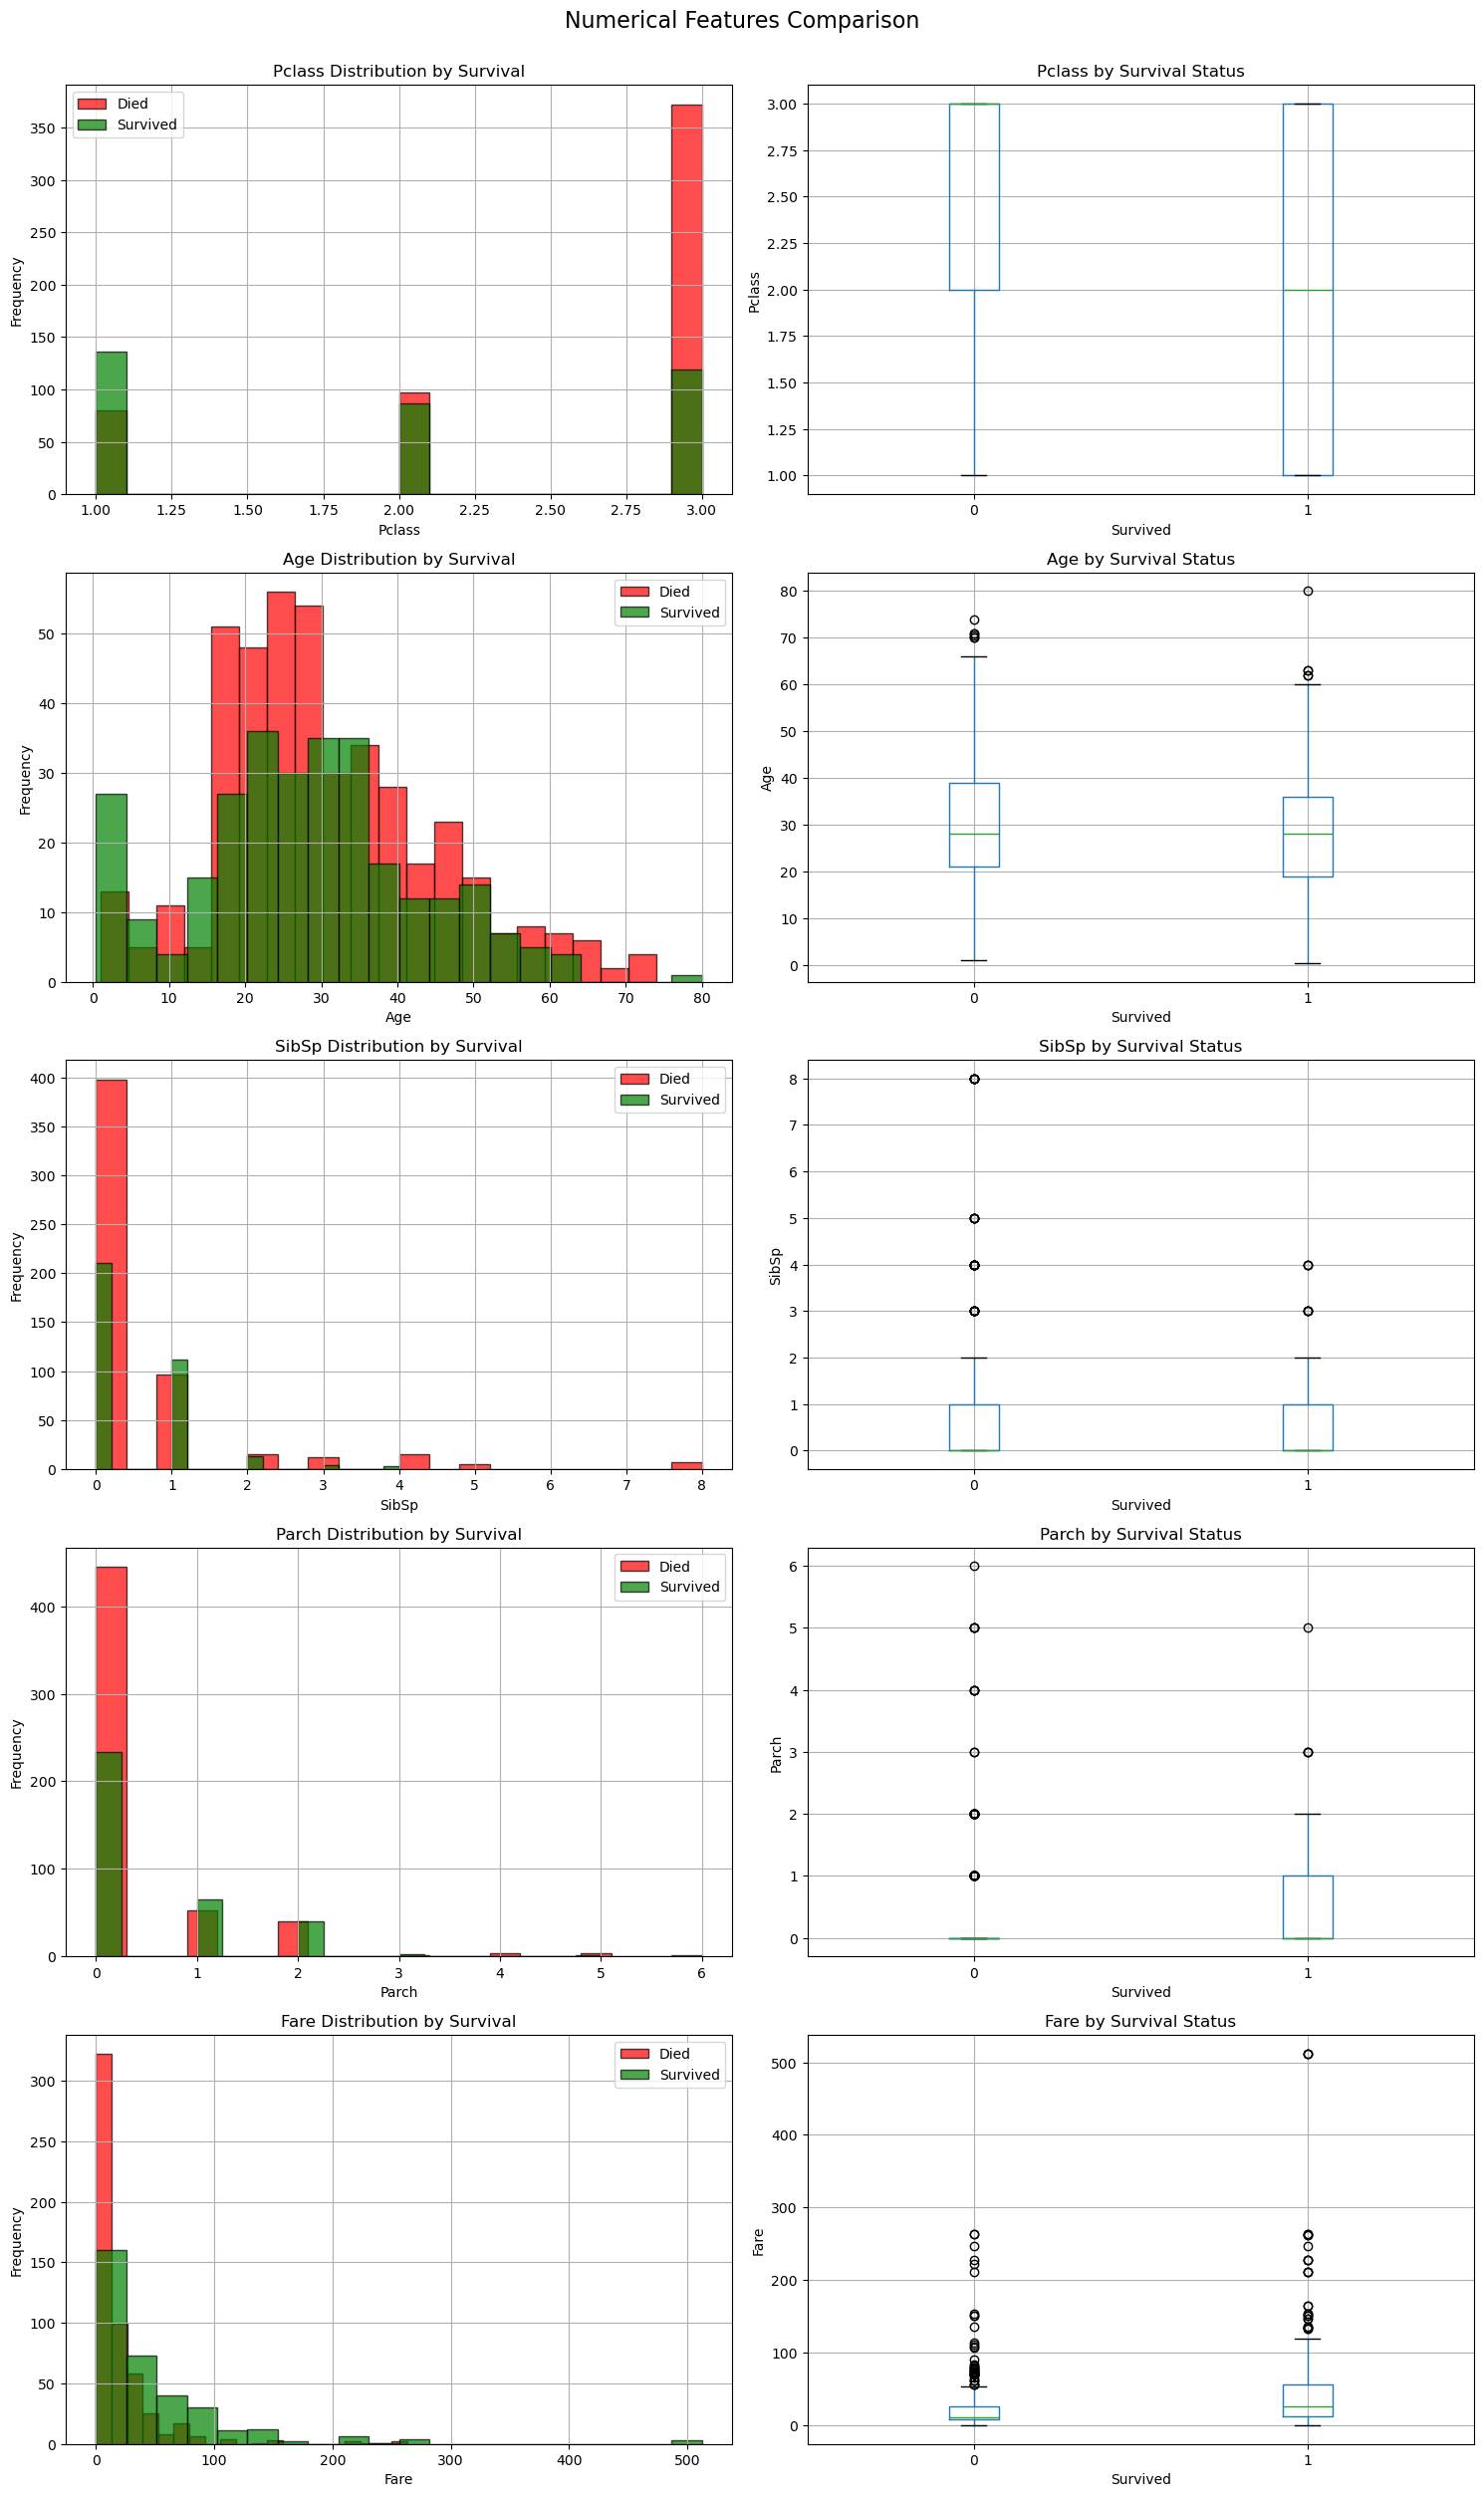

In [11]:
# 5. VISUALIZATION - NUMERICAL FEATURES
# ============================================================

fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(15, 5*len(numerical_cols)))
if len(numerical_cols) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(numerical_cols):
    # Histogram by survival
    data[data['Survived']==0][col].hist(ax=axes[idx,0], bins=20, alpha=0.7, 
                                         label='Died', color='red', edgecolor='black')
    data[data['Survived']==1][col].hist(ax=axes[idx,0], bins=20, alpha=0.7, 
                                         label='Survived', color='green', edgecolor='black')
    axes[idx,0].set_xlabel(col)
    axes[idx,0].set_ylabel('Frequency')
    axes[idx,0].set_title(f'{col} Distribution by Survival')
    axes[idx,0].legend()
    
    # Box plot by survival
    data.boxplot(column=col, by='Survived', ax=axes[idx,1])
    axes[idx,1].set_xlabel('Survived')
    axes[idx,1].set_ylabel(col)
    axes[idx,1].set_title(f'{col} by Survival Status')

plt.suptitle('Numerical Features Comparison', y=1.001, fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\DT\AppData\Local\Temp\ipykernel_8320\410032516.py:27: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


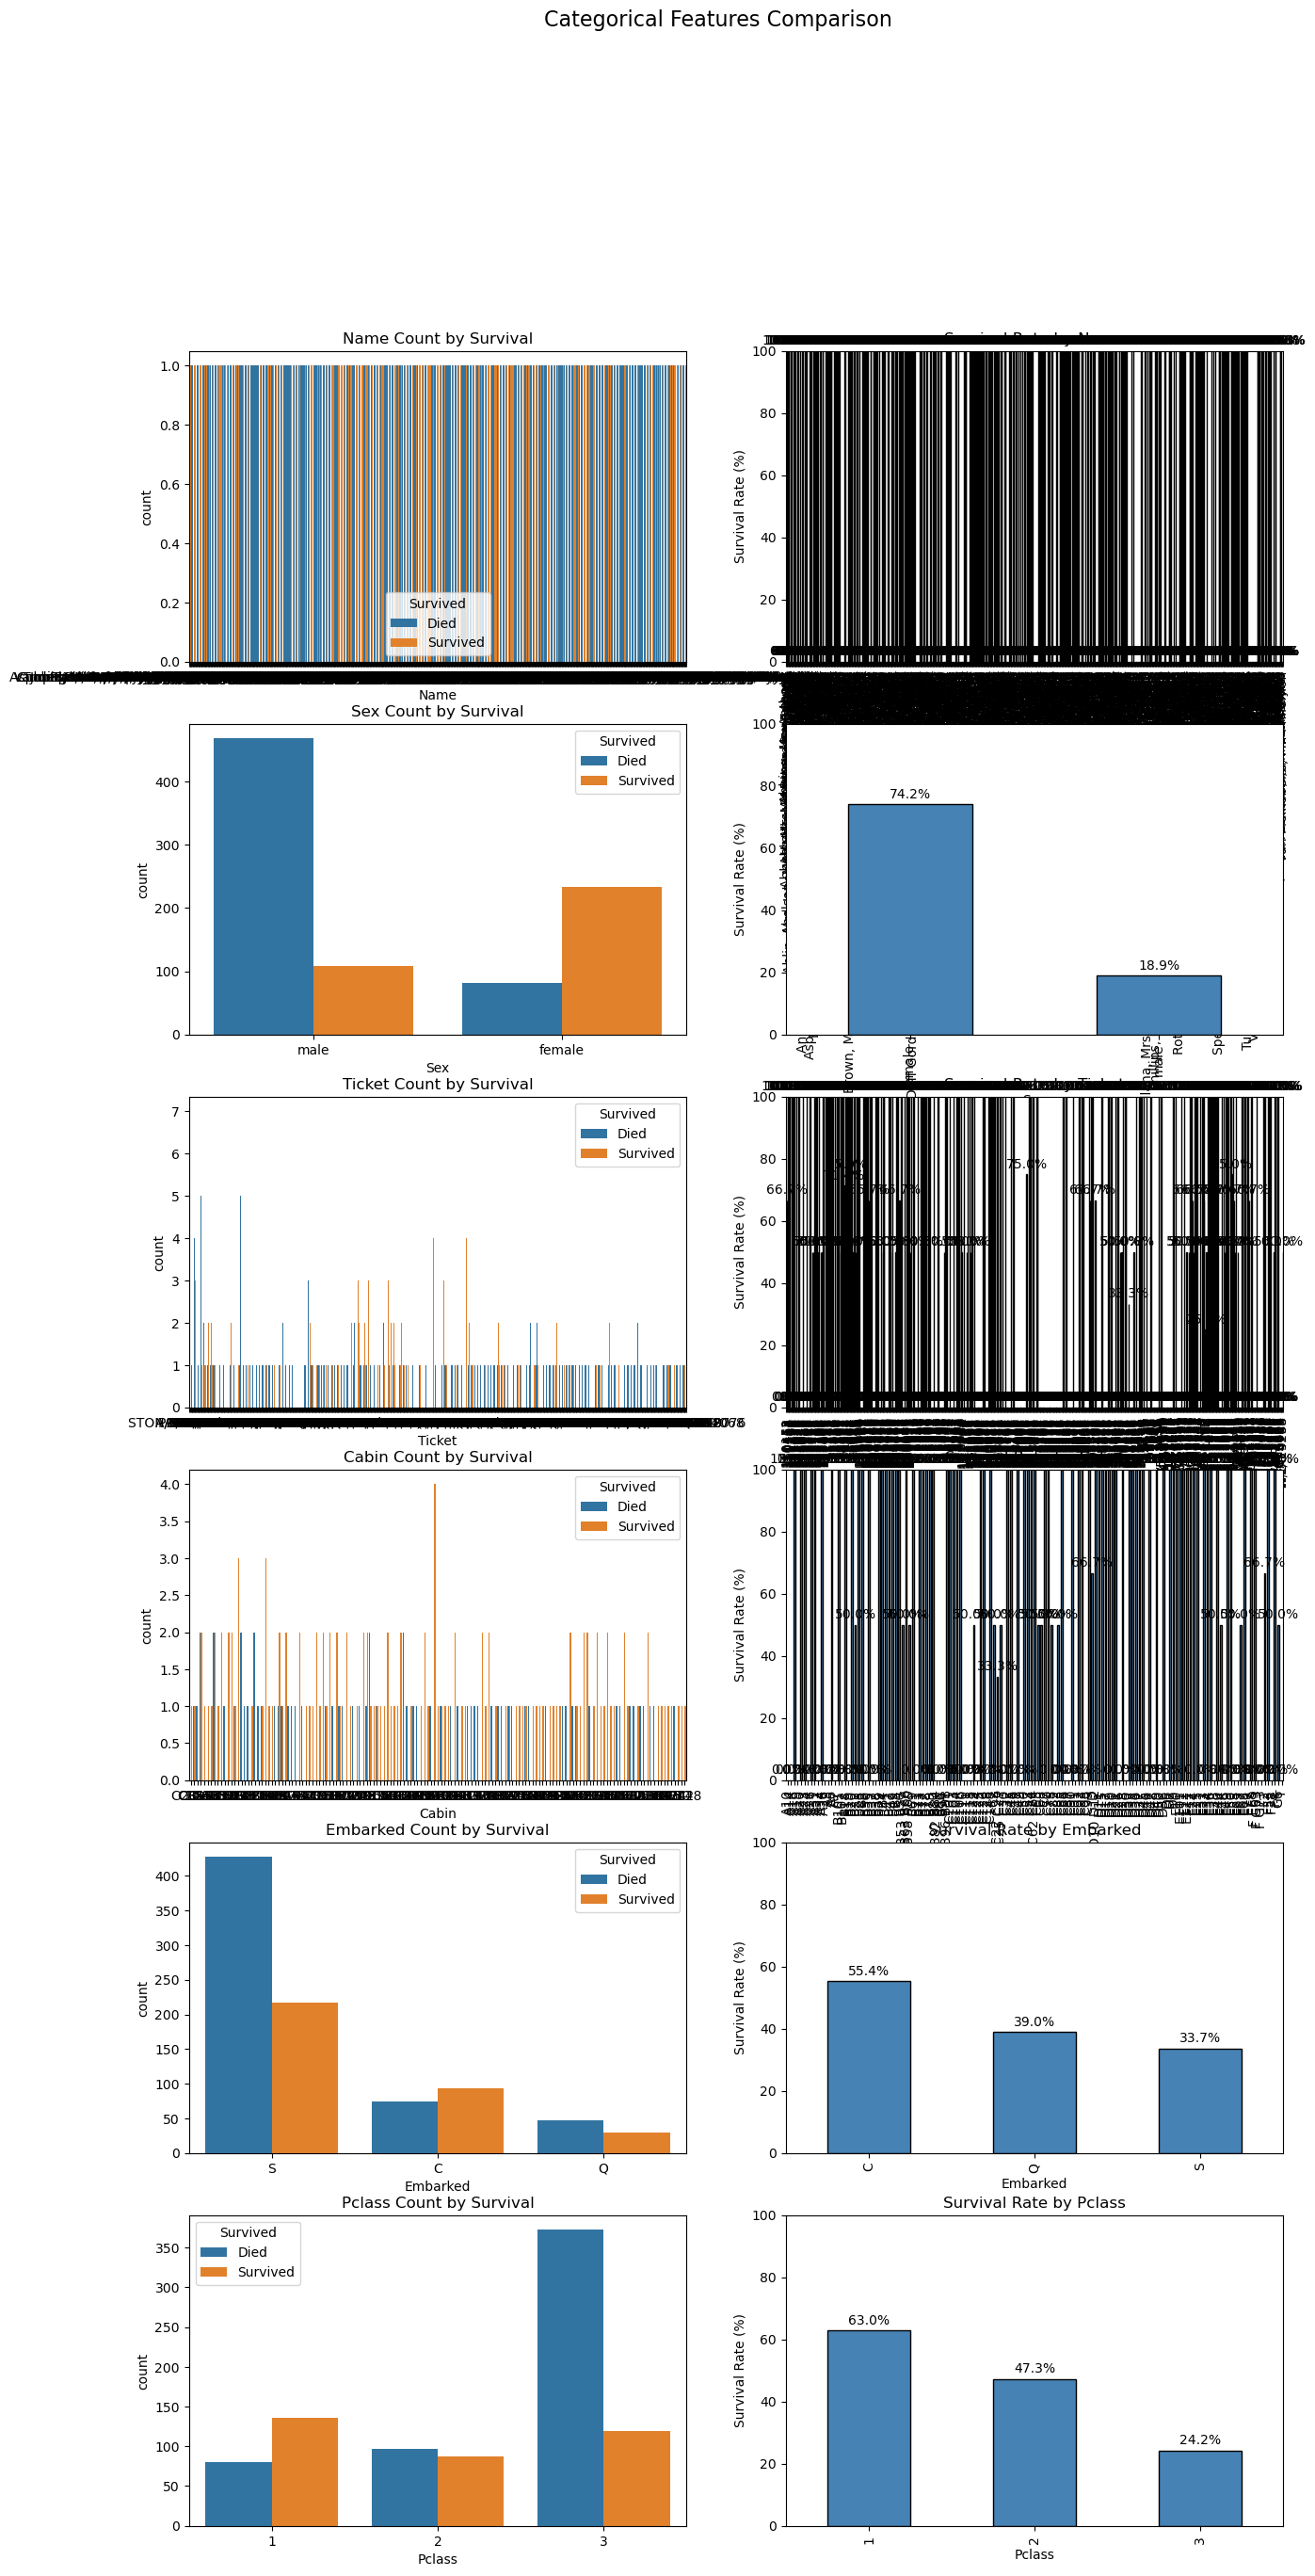

In [12]:
# 6. VISUALIZATION - CATEGORICAL FEATURES
# ============================================================

fig, axes = plt.subplots(len(categorical_cols), 2, figsize=(15, 5*len(categorical_cols)))
if len(categorical_cols) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(categorical_cols):
    if col in data.columns:
        # Count plot
        sns.countplot(data=data, x=col, hue='Survived', ax=axes[idx,0])
        axes[idx,0].set_title(f'{col} Count by Survival')
        axes[idx,0].legend(title='Survived', labels=['Died', 'Survived'])
        
        # Survival rate by category
        survival_rate = data.groupby(col)['Survived'].mean() * 100
        survival_rate.plot(kind='bar', ax=axes[idx,1], color='steelblue', edgecolor='black')
        axes[idx,1].set_ylabel('Survival Rate (%)')
        axes[idx,1].set_title(f'Survival Rate by {col}')
        axes[idx,1].set_ylim([0, 100])
        
        # Add value labels
        for i, v in enumerate(survival_rate):
            axes[idx,1].text(i, v + 2, f'{v:.1f}%', ha='center')

plt.suptitle('Categorical Features Comparison', y=1.001, fontsize=16)
plt.tight_layout()
plt.show()


CORRELATION WITH SURVIVAL
Fare      0.257307
Parch     0.081629
SibSp    -0.035322
Age      -0.077221
Pclass   -0.338481
Name: Survived, dtype: float64


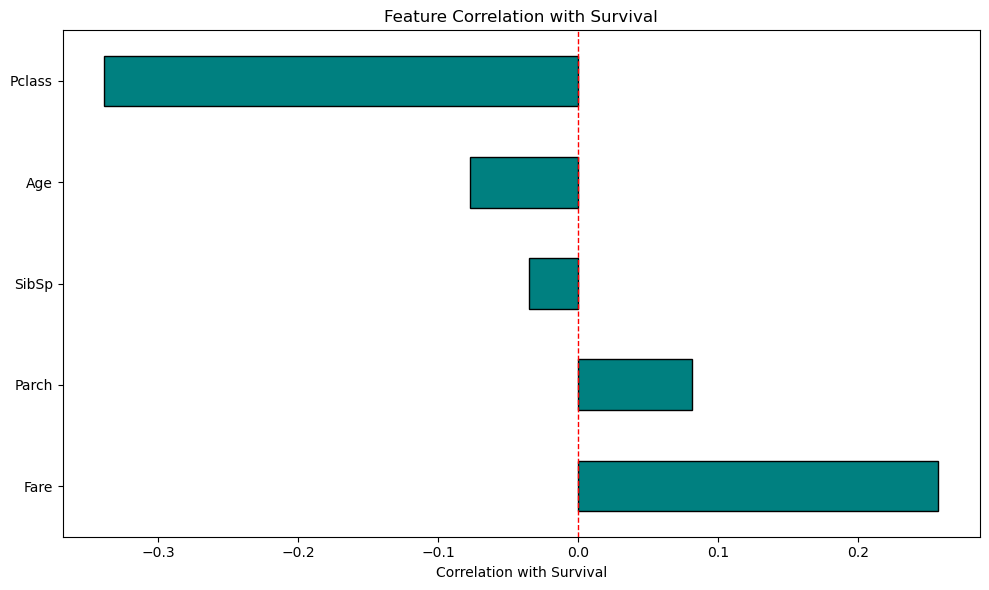

In [13]:
# 7. CORRELATION ANALYSIS
# ============================================================

print("\n" + "="*50)
print("CORRELATION WITH SURVIVAL")
print("="*50)

# Calculate correlations
correlations = data[numerical_cols + ['Survived']].corr()['Survived'].drop('Survived').sort_values(ascending=False)
print(correlations)

# Visualize correlation
plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='teal', edgecolor='black')
plt.xlabel('Correlation with Survival')
plt.title('Feature Correlation with Survival')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [15]:
# 8. SUMMARY - MOST IMPORTANT FEATURES
# ============================================================

print("\n" + "="*50)
print("FEATURE IMPORTANCE SUMMARY")
print("="*50)

# Combine results
importance_summary = []

# Numerical features
for col in numerical_cols:
    survived = data[data['Survived'] == 1][col].dropna()
    died = data[data['Survived'] == 0][col].dropna()
    t_stat, p_value = stats.ttest_ind(survived, died)
    corr = correlations[col] if col in correlations.index else 0
    
    importance_summary.append({
        'Feature': col,
        'Type': 'Numerical',
        'P-value': p_value,
        'Correlation': abs(corr),
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

# Categorical features
for col in categorical_cols:
    if col in data.columns:
        chi2, p_value, dof, expected = stats.chi2_contingency(
            pd.crosstab(data[col], data['Survived'])
        )
        
        importance_summary.append({
            'Feature': col,
            'Type': 'Categorical',
            'P-value': p_value,
            'Correlation': chi2 / len(data),  # Normalized chi-square
            'Significant': 'Yes' if p_value < 0.05 else 'No'
        })

# Create summary dataframe
summary_df = pd.DataFrame(importance_summary)
summary_df = summary_df.sort_values('P-value')

print("\nFeature Importance Ranking:")
print(summary_df.to_string(index=False))

print("\n" + "="*50)
print("CONCLUSION")
print("="*50)
print("\nMost Important Features for Survival (p < 0.05):")
significant_features = summary_df[summary_df['Significant'] == 'Yes']
for idx, row in significant_features.iterrows():
    print(f"  {idx+1}. {row['Feature']} (p-value: {row['P-value']:.6f})")

print("\nThese features show statistically significant relationships with survival!")


FEATURE IMPORTANCE SUMMARY

Feature Importance Ranking:
 Feature        Type      P-value  Correlation Significant
     Sex Categorical 1.197357e-58     0.292612         Yes
  Pclass   Numerical 2.537047e-25     0.338481         Yes
  Pclass Categorical 4.549252e-23     0.115476         Yes
    Fare   Numerical 6.120189e-15     0.257307         Yes
Embarked Categorical 1.769922e-06     0.029730         Yes
  Ticket Categorical 1.152730e-02     0.860348         Yes
   Parch   Numerical 1.479925e-02     0.081629         Yes
     Age   Numerical 3.912465e-02     0.077221         Yes
   Cabin Categorical 1.835735e-01     0.180976          No
   SibSp   Numerical 2.922439e-01     0.035322          No
    Name Categorical 4.842482e-01     1.000000          No

CONCLUSION

Most Important Features for Survival (p < 0.05):
  7. Sex (p-value: 0.000000)
  1. Pclass (p-value: 0.000000)
  11. Pclass (p-value: 0.000000)
  5. Fare (p-value: 0.000000)
  10. Embarked (p-value: 0.000002)
  8. Ticket (p

## One By One 


1. PCLASS (Passenger Class) ANALYSIS

Value counts:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Survival rate by Pclass:
        Survived_Count  Total  Survival_Rate
Pclass                                      
1                  136    216          62.96
2                   87    184          47.28
3                  119    491          24.24

Chi-square test: χ² = 102.8890, p-value = 0.000000
IMPORTANCE: HIGH ✓


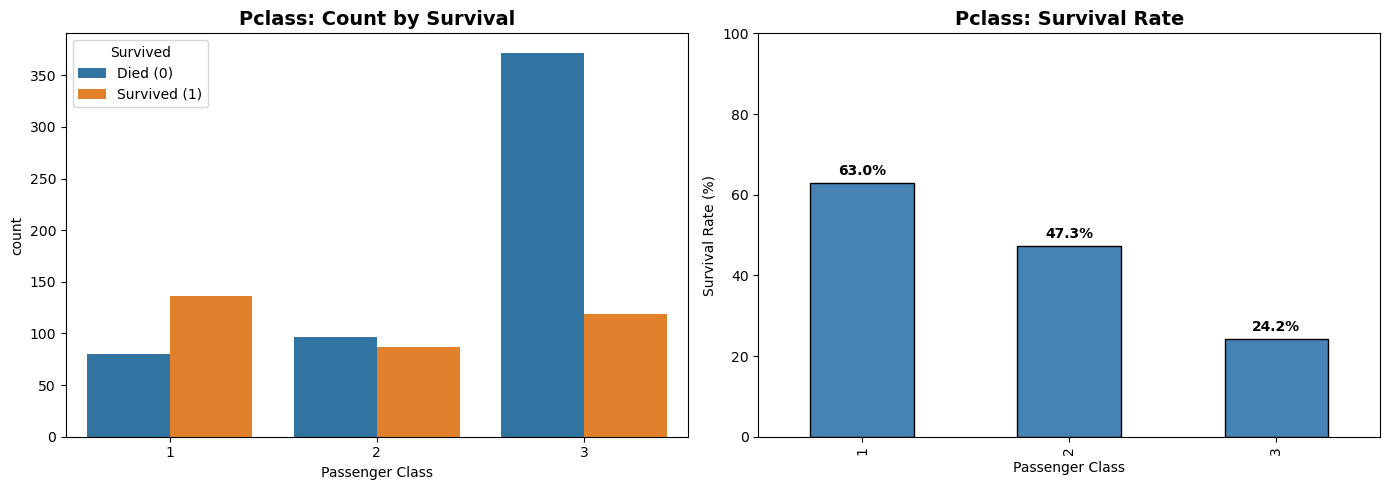

In [16]:
# ------------------------------------------------------------
# 1. PCLASS (Passenger Class) - CATEGORICAL
# ------------------------------------------------------------
print("\n" + "="*60)
print("1. PCLASS (Passenger Class) ANALYSIS")
print("="*60)

# Basic info
print("\nValue counts:")
print(df['Pclass'].value_counts().sort_index())

# Survival rate by Pclass
print("\nSurvival rate by Pclass:")
survival_pclass = df.groupby('Pclass')['Survived'].agg(['sum', 'count', 'mean'])
survival_pclass.columns = ['Survived_Count', 'Total', 'Survival_Rate']
survival_pclass['Survival_Rate'] = (survival_pclass['Survival_Rate'] * 100).round(2)
print(survival_pclass)

# Statistical test (Chi-square)
chi2, p_value, dof, expected = stats.chi2_contingency(
    pd.crosstab(df['Pclass'], df['Survived'])
)
print(f"\nChi-square test: χ² = {chi2:.4f}, p-value = {p_value:.6f}")
print(f"IMPORTANCE: {'HIGH ✓' if p_value < 0.05 else 'LOW ✗'}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[0])
axes[0].set_title('Pclass: Count by Survival', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Passenger Class')
axes[0].legend(title='Survived', labels=['Died (0)', 'Survived (1)'])

# Survival rate
survival_pclass['Survival_Rate'].plot(kind='bar', ax=axes[1], color='steelblue', edgecolor='black')
axes[1].set_title('Pclass: Survival Rate', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_ylim([0, 100])
for i, v in enumerate(survival_pclass['Survival_Rate']):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



2. SEX (Gender) ANALYSIS

Value counts:
Sex
male      577
female    314
Name: count, dtype: int64

Survival rate by Sex:
        Survived_Count  Total  Survival_Rate
Sex                                         
female             233    314          74.20
male               109    577          18.89

Chi-square test: χ² = 260.7170, p-value = 0.000000
IMPORTANCE: HIGH ✓


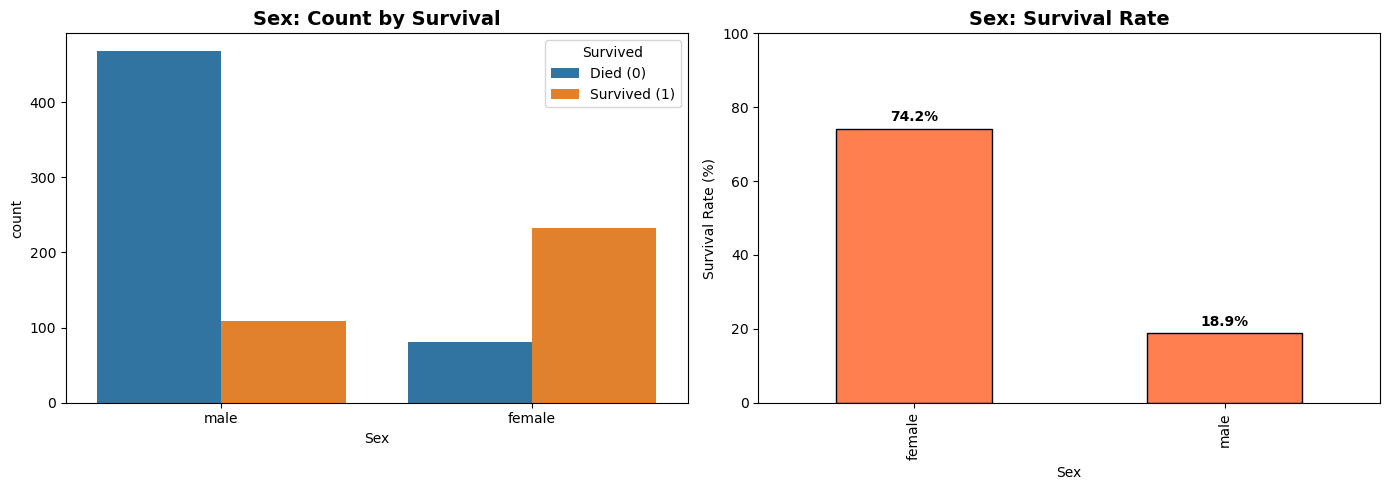

In [17]:
# ------------------------------------------------------------
# 2. SEX (Gender) - CATEGORICAL
# ------------------------------------------------------------
print("\n" + "="*60)
print("2. SEX (Gender) ANALYSIS")
print("="*60)

# Basic info
print("\nValue counts:")
print(df['Sex'].value_counts())

# Survival rate by Sex
print("\nSurvival rate by Sex:")
survival_sex = df.groupby('Sex')['Survived'].agg(['sum', 'count', 'mean'])
survival_sex.columns = ['Survived_Count', 'Total', 'Survival_Rate']
survival_sex['Survival_Rate'] = (survival_sex['Survival_Rate'] * 100).round(2)
print(survival_sex)

# Statistical test
chi2, p_value, dof, expected = stats.chi2_contingency(
    pd.crosstab(df['Sex'], df['Survived'])
)
print(f"\nChi-square test: χ² = {chi2:.4f}, p-value = {p_value:.6f}")
print(f"IMPORTANCE: {'HIGH ✓' if p_value < 0.05 else 'LOW ✗'}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[0])
axes[0].set_title('Sex: Count by Survival', fontsize=14, fontweight='bold')
axes[0].legend(title='Survived', labels=['Died (0)', 'Survived (1)'])

survival_sex['Survival_Rate'].plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Sex: Survival Rate', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_ylim([0, 100])
for i, v in enumerate(survival_sex['Survival_Rate']):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


3. AGE ANALYSIS

Missing values: 177 (19.9%)

Basic statistics:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Mean Age (Survived): 28.34 years
Mean Age (Died): 30.63 years
Median Age (Survived): 28.00 years
Median Age (Died): 28.00 years

T-test: t = -2.0667, p-value = 0.039125
IMPORTANCE: HIGH ✓
Correlation with Survival: -0.0772


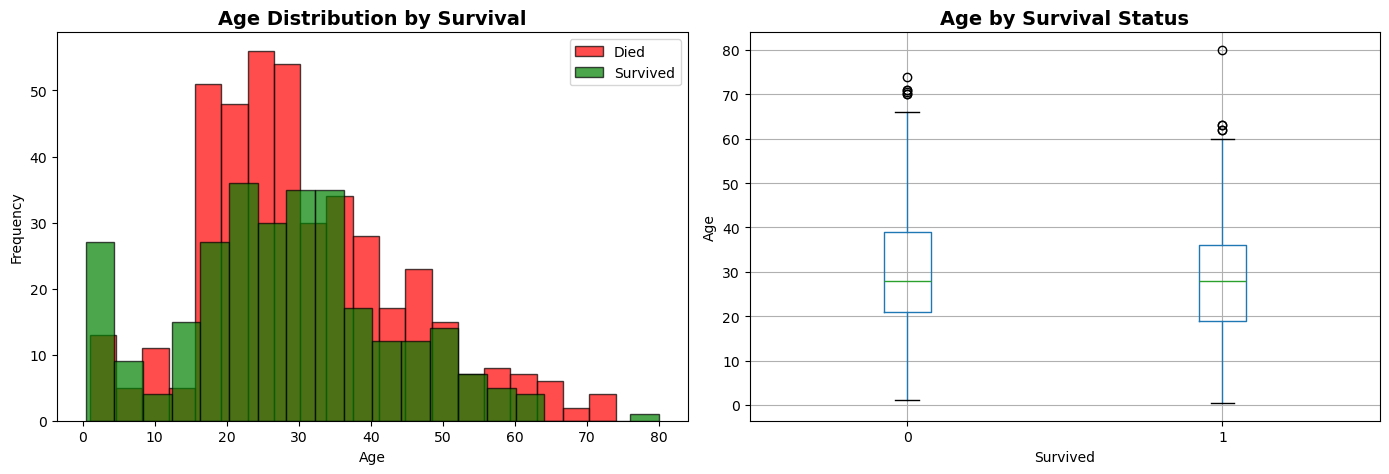

In [18]:
# ------------------------------------------------------------
# 3. AGE - NUMERICAL
# ------------------------------------------------------------
print("\n" + "="*60)
print("3. AGE ANALYSIS")
print("="*60)

# Basic statistics
print(f"\nMissing values: {df['Age'].isnull().sum()} ({df['Age'].isnull().sum()/len(df)*100:.1f}%)")
print("\nBasic statistics:")
print(df['Age'].describe())

# Compare by survival
survived = df[df['Survived'] == 1]['Age'].dropna()
died = df[df['Survived'] == 0]['Age'].dropna()

print(f"\nMean Age (Survived): {survived.mean():.2f} years")
print(f"Mean Age (Died): {died.mean():.2f} years")
print(f"Median Age (Survived): {survived.median():.2f} years")
print(f"Median Age (Died): {died.median():.2f} years")

# Statistical test (T-test)
t_stat, p_value = stats.ttest_ind(survived, died)
print(f"\nT-test: t = {t_stat:.4f}, p-value = {p_value:.6f}")
print(f"IMPORTANCE: {'HIGH ✓' if p_value < 0.05 else 'LOW ✗'}")

# Correlation
corr = df[['Age', 'Survived']].corr().iloc[0, 1]
print(f"Correlation with Survival: {corr:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
died_age = df[df['Survived']==0]['Age'].dropna()
survived_age = df[df['Survived']==1]['Age'].dropna()
axes[0].hist(died_age, bins=20, alpha=0.7, label='Died', color='red', edgecolor='black')
axes[0].hist(survived_age, bins=20, alpha=0.7, label='Survived', color='green', edgecolor='black')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution by Survival', fontsize=14, fontweight='bold')
axes[0].legend()

# Box plot
df.boxplot(column='Age', by='Survived', ax=axes[1])
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')
axes[1].set_title('Age by Survival Status', fontsize=14, fontweight='bold')

plt.suptitle('')
plt.tight_layout()
plt.show()




4. SIBSP (Siblings/Spouses Aboard) ANALYSIS

Value counts:
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64

Survival rate by SibSp:
       Survived_Count  Total  Survival_Rate
SibSp                                      
0                 210    608          34.54
1                 112    209          53.59
2                  13     28          46.43
3                   4     16          25.00
4                   3     18          16.67
5                   0      5           0.00
8                   0      7           0.00

Mean SibSp (Survived): 0.47
Mean SibSp (Died): 0.55

T-test: t = -1.0538, p-value = 0.292244
IMPORTANCE: LOW ✗


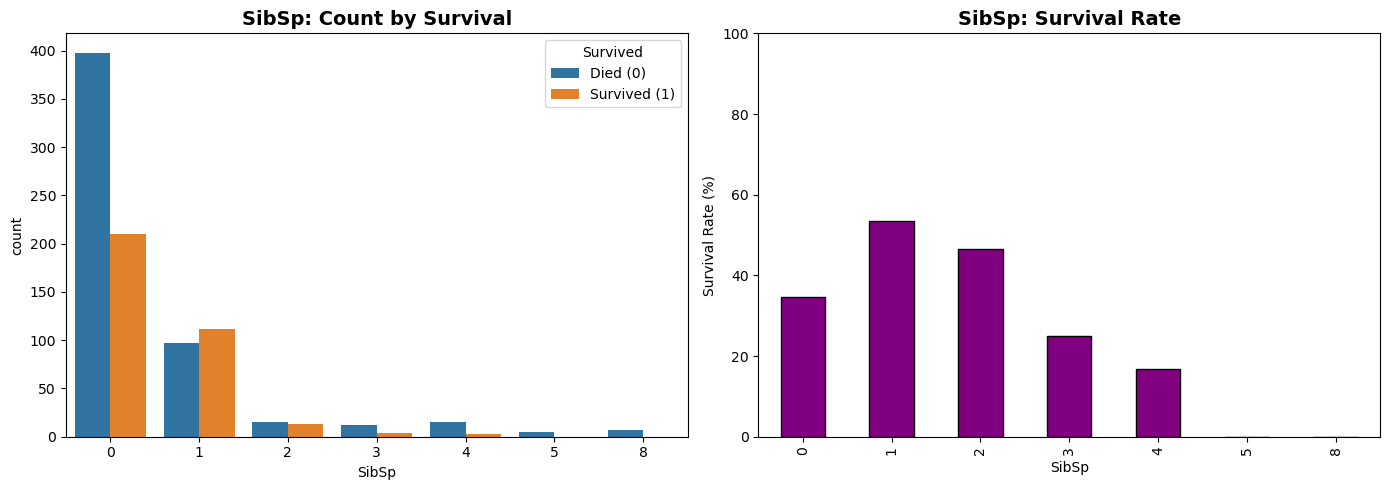

In [19]:
# ------------------------------------------------------------
# 4. SIBSP (Siblings/Spouses) - NUMERICAL
# ------------------------------------------------------------
print("\n" + "="*60)
print("4. SIBSP (Siblings/Spouses Aboard) ANALYSIS")
print("="*60)

print("\nValue counts:")
print(df['SibSp'].value_counts().sort_index())

# Survival rate by SibSp
print("\nSurvival rate by SibSp:")
survival_sibsp = df.groupby('SibSp')['Survived'].agg(['sum', 'count', 'mean'])
survival_sibsp.columns = ['Survived_Count', 'Total', 'Survival_Rate']
survival_sibsp['Survival_Rate'] = (survival_sibsp['Survival_Rate'] * 100).round(2)
print(survival_sibsp)

# Compare by survival
survived = df[df['Survived'] == 1]['SibSp']
died = df[df['Survived'] == 0]['SibSp']

print(f"\nMean SibSp (Survived): {survived.mean():.2f}")
print(f"Mean SibSp (Died): {died.mean():.2f}")

# Statistical test
t_stat, p_value = stats.ttest_ind(survived, died)
print(f"\nT-test: t = {t_stat:.4f}, p-value = {p_value:.6f}")
print(f"IMPORTANCE: {'HIGH ✓' if p_value < 0.05 else 'LOW ✗'}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='SibSp', hue='Survived', ax=axes[0])
axes[0].set_title('SibSp: Count by Survival', fontsize=14, fontweight='bold')
axes[0].legend(title='Survived', labels=['Died (0)', 'Survived (1)'])

survival_sibsp['Survival_Rate'].plot(kind='bar', ax=axes[1], color='purple', edgecolor='black')
axes[1].set_title('SibSp: Survival Rate', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_ylim([0, 100])

plt.tight_layout()
plt.show()


5. PARCH (Parents/Children Aboard) ANALYSIS

Value counts:
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

Survival rate by Parch:
       Survived_Count  Total  Survival_Rate
Parch                                      
0                 233    678          34.37
1                  65    118          55.08
2                  40     80          50.00
3                   3      5          60.00
4                   0      4           0.00
5                   1      5          20.00
6                   0      1           0.00

Mean Parch (Survived): 0.46
Mean Parch (Died): 0.33

T-test: t = 2.4420, p-value = 0.014799
IMPORTANCE: HIGH ✓


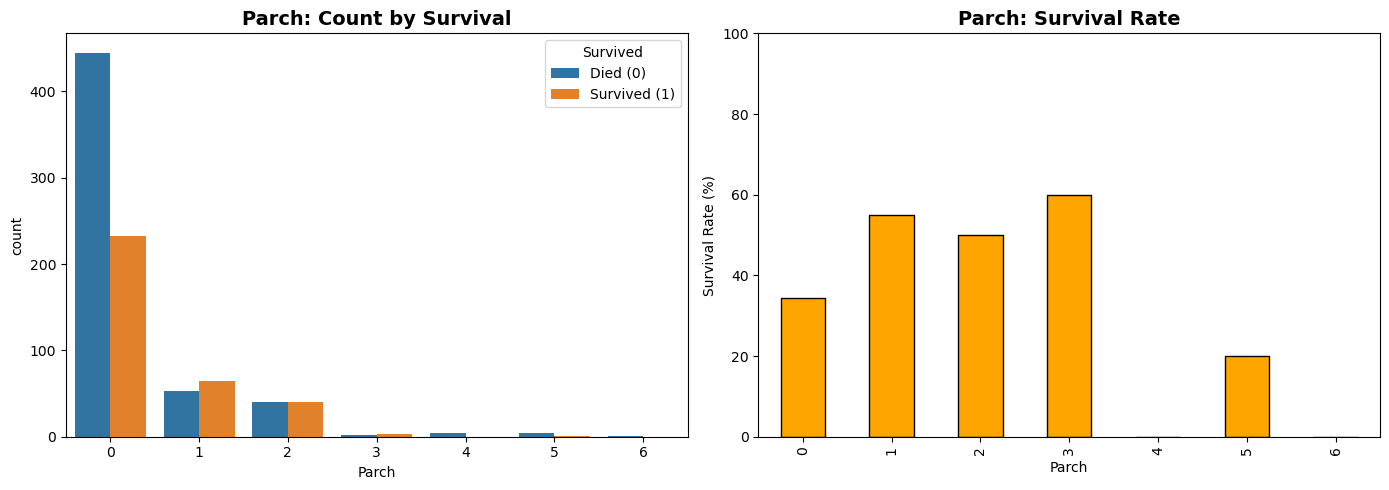

In [20]:
# ------------------------------------------------------------
# 5. PARCH (Parents/Children) - NUMERICAL
# ------------------------------------------------------------
print("\n" + "="*60)
print("5. PARCH (Parents/Children Aboard) ANALYSIS")
print("="*60)

print("\nValue counts:")
print(df['Parch'].value_counts().sort_index())

# Survival rate by Parch
print("\nSurvival rate by Parch:")
survival_parch = df.groupby('Parch')['Survived'].agg(['sum', 'count', 'mean'])
survival_parch.columns = ['Survived_Count', 'Total', 'Survival_Rate']
survival_parch['Survival_Rate'] = (survival_parch['Survival_Rate'] * 100).round(2)
print(survival_parch)

# Compare by survival
survived = df[df['Survived'] == 1]['Parch']
died = df[df['Survived'] == 0]['Parch']

print(f"\nMean Parch (Survived): {survived.mean():.2f}")
print(f"Mean Parch (Died): {died.mean():.2f}")

# Statistical test
t_stat, p_value = stats.ttest_ind(survived, died)
print(f"\nT-test: t = {t_stat:.4f}, p-value = {p_value:.6f}")
print(f"IMPORTANCE: {'HIGH ✓' if p_value < 0.05 else 'LOW ✗'}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='Parch', hue='Survived', ax=axes[0])
axes[0].set_title('Parch: Count by Survival', fontsize=14, fontweight='bold')
axes[0].legend(title='Survived', labels=['Died (0)', 'Survived (1)'])

survival_parch['Survival_Rate'].plot(kind='bar', ax=axes[1], color='orange', edgecolor='black')
axes[1].set_title('Parch: Survival Rate', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_ylim([0, 100])

plt.tight_layout()
plt.show()



6. FARE ANALYSIS

Missing values: 0

Basic statistics:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Mean Fare (Survived): $48.40
Mean Fare (Died): $22.12
Median Fare (Survived): $26.00
Median Fare (Died): $10.50

T-test: t = 7.9392, p-value = 0.000000
IMPORTANCE: HIGH ✓
Correlation with Survival: 0.2573


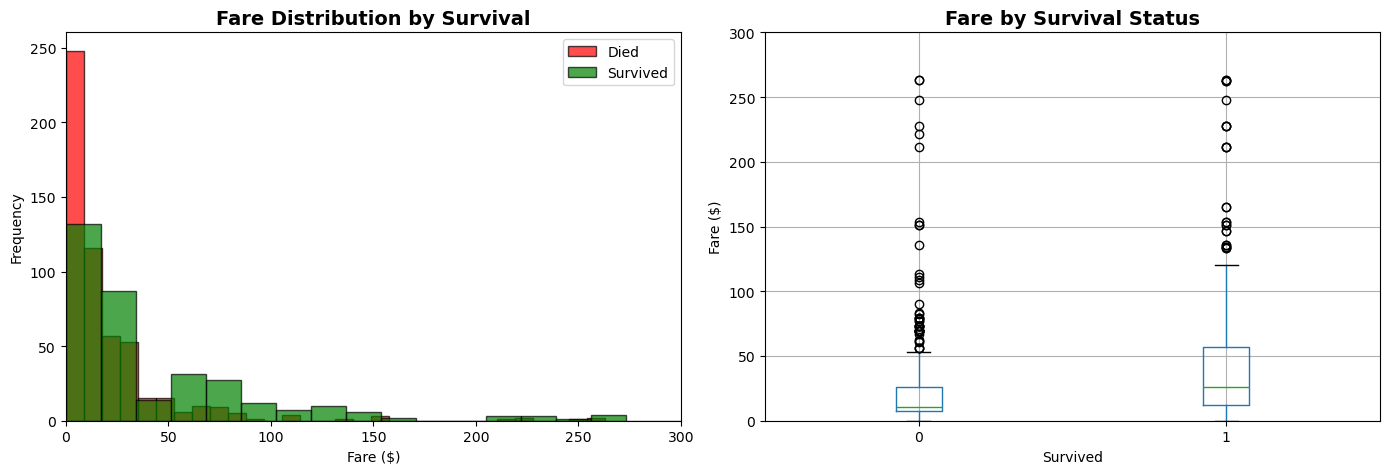

In [21]:
# ------------------------------------------------------------
# 6. FARE - NUMERICAL
# ------------------------------------------------------------
print("\n" + "="*60)
print("6. FARE ANALYSIS")
print("="*60)

print(f"\nMissing values: {df['Fare'].isnull().sum()}")
print("\nBasic statistics:")
print(df['Fare'].describe())

# Compare by survival
survived = df[df['Survived'] == 1]['Fare'].dropna()
died = df[df['Survived'] == 0]['Fare'].dropna()

print(f"\nMean Fare (Survived): ${survived.mean():.2f}")
print(f"Mean Fare (Died): ${died.mean():.2f}")
print(f"Median Fare (Survived): ${survived.median():.2f}")
print(f"Median Fare (Died): ${died.median():.2f}")

# Statistical test
t_stat, p_value = stats.ttest_ind(survived, died)
print(f"\nT-test: t = {t_stat:.4f}, p-value = {p_value:.6f}")
print(f"IMPORTANCE: {'HIGH ✓' if p_value < 0.05 else 'LOW ✗'}")

# Correlation
corr = df[['Fare', 'Survived']].corr().iloc[0, 1]
print(f"Correlation with Survival: {corr:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

died_fare = df[df['Survived']==0]['Fare'].dropna()
survived_fare = df[df['Survived']==1]['Fare'].dropna()
axes[0].hist(died_fare, bins=30, alpha=0.7, label='Died', color='red', edgecolor='black')
axes[0].hist(survived_fare, bins=30, alpha=0.7, label='Survived', color='green', edgecolor='black')
axes[0].set_xlabel('Fare ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Fare Distribution by Survival', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].set_xlim([0, 300])  # Limit for better visualization

df.boxplot(column='Fare', by='Survived', ax=axes[1])
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Fare ($)')
axes[1].set_title('Fare by Survival Status', fontsize=14, fontweight='bold')
axes[1].set_ylim([0, 300])  # Limit for better visualization

plt.suptitle('')
plt.tight_layout()
plt.show()



7. EMBARKED (Port of Embarkation) ANALYSIS

Missing values: 2

Value counts:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Ports: C = Cherbourg, Q = Queenstown, S = Southampton

Survival rate by Embarked:
          Survived_Count  Total  Survival_Rate
Embarked                                      
C                     93    168          55.36
Q                     30     77          38.96
S                    217    644          33.70

Chi-square test: χ² = 29.6706, p-value = 0.000002
IMPORTANCE: HIGH ✓


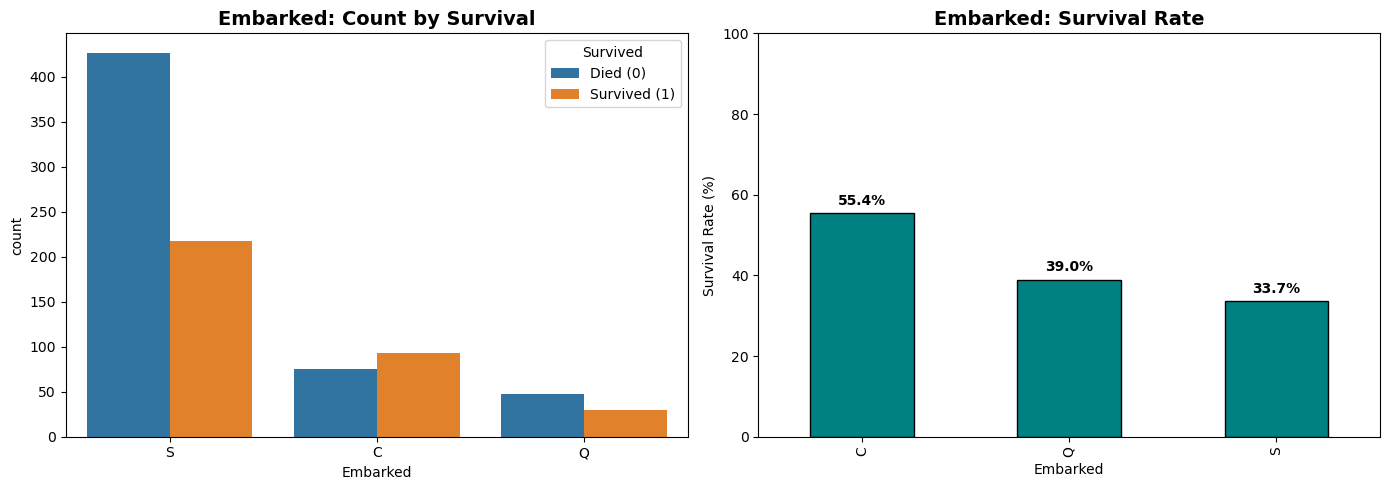

In [22]:
# ------------------------------------------------------------
# 7. EMBARKED (Port of Embarkation) - CATEGORICAL
# ------------------------------------------------------------
print("\n" + "="*60)
print("7. EMBARKED (Port of Embarkation) ANALYSIS")
print("="*60)

print(f"\nMissing values: {df['Embarked'].isnull().sum()}")
print("\nValue counts:")
print(df['Embarked'].value_counts())
print("\nPorts: C = Cherbourg, Q = Queenstown, S = Southampton")

# Survival rate by Embarked
print("\nSurvival rate by Embarked:")
survival_embarked = df.groupby('Embarked')['Survived'].agg(['sum', 'count', 'mean'])
survival_embarked.columns = ['Survived_Count', 'Total', 'Survival_Rate']
survival_embarked['Survival_Rate'] = (survival_embarked['Survival_Rate'] * 100).round(2)
print(survival_embarked)

# Statistical test
chi2, p_value, dof, expected = stats.chi2_contingency(
    pd.crosstab(df['Embarked'].fillna('Missing'), df['Survived'])
)
print(f"\nChi-square test: χ² = {chi2:.4f}, p-value = {p_value:.6f}")
print(f"IMPORTANCE: {'HIGH ✓' if p_value < 0.05 else 'LOW ✗'}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='Embarked', hue='Survived', ax=axes[0])
axes[0].set_title('Embarked: Count by Survival', fontsize=14, fontweight='bold')
axes[0].legend(title='Survived', labels=['Died (0)', 'Survived (1)'])

survival_embarked['Survival_Rate'].plot(kind='bar', ax=axes[1], color='teal', edgecolor='black')
axes[1].set_title('Embarked: Survival Rate', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_ylim([0, 100])
for i, v in enumerate(survival_embarked['Survival_Rate']):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [23]:
# ------------------------------------------------------------
# FINAL SUMMARY
# ------------------------------------------------------------
print("\n" + "="*60)
print("SUMMARY: FEATURE IMPORTANCE FOR SURVIVAL")
print("="*60)
print("\n✓ HIGH IMPORTANCE (p < 0.05): Strong predictor of survival")
print("✗ LOW IMPORTANCE (p >= 0.05): Weak predictor of survival")
print("\nInterpretation: Lower p-value = More important for predicting survival")


SUMMARY: FEATURE IMPORTANCE FOR SURVIVAL

✓ HIGH IMPORTANCE (p < 0.05): Strong predictor of survival
✗ LOW IMPORTANCE (p >= 0.05): Weak predictor of survival

Interpretation: Lower p-value = More important for predicting survival
